### Import libraries

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import orders_products_merged4.pkl

In [9]:
# Import the dataset 'customers_ords_prods.pkl'
df_cust_ords = pd.read_pickle('customers_ords_prods.pkl')

### Creating a bar chart with 'order_day_of_week'

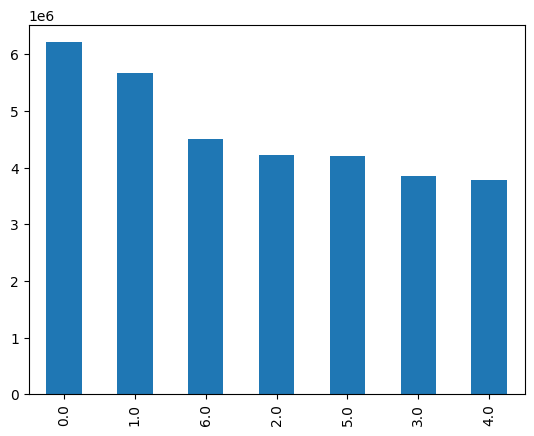

In [10]:
# Create a bar chart
bar = df_cust_ords['order_day_of_week'].value_counts().plot.bar()

### Creating a histogram with prices

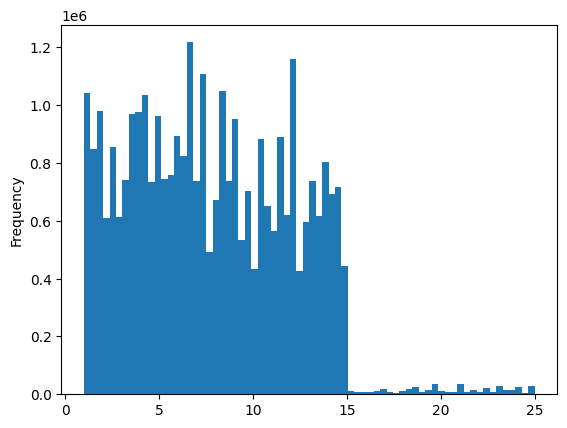

In [36]:
hist = df_cust_ords['prices'].plot.hist(bins = 70)

In [12]:
df_cust_ords['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Creating a scatterplot with prices

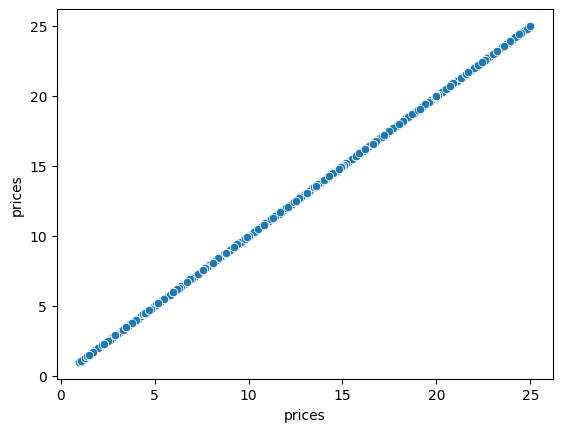

In [38]:
scatter_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_ords)

### Making a line chart of a random sample for 'order_day_of_week'

In [16]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_cust_ords)) <= 0.7

In [17]:
# Store 70% of the sample in the 'big' dataframe
big = df_cust_ords[dev]

In [18]:
# Store 30% of the sample in the 'small' dataframe
small = df_cust_ords[~dev]

In [19]:
len(df_cust_ords)

32435059

In [20]:
# Checking if I correctly achieved the results my tallying the results of the above code with this
len(big) + len(small)

32435059

In [21]:
# Reducing your samples to only those columns necessary for the chart
df_2 = small[['order_day_of_week','prices']]

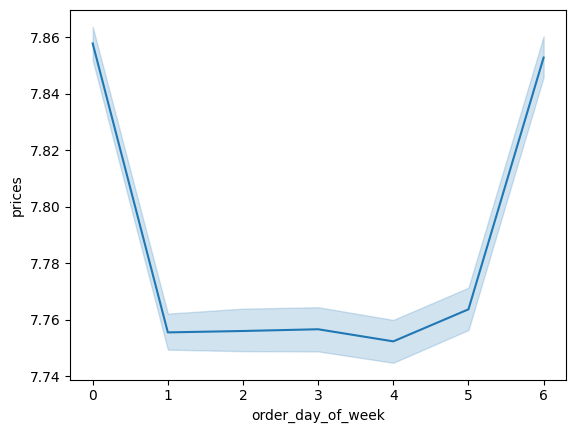

In [43]:
# Creating a line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

### Creating a histogram of 'order_hour_of_day'

In [23]:
df_cust_ords['order_hour_of_day'].describe()

count    3.243506e+07
mean     1.342498e+01
std      4.246357e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

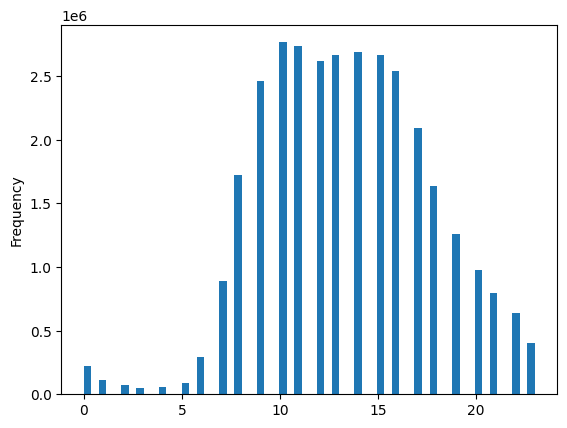

In [24]:
hist_2 = df_cust_ords['order_hour_of_day'].plot.hist(bins = 60)

The histogram shows that most orders take place at 10 am and around that time. Eventually the frequency of orders decline. The lowest orders were experienced around 1 am to 4 am. 

### Creating a bar chart from the loyalty flag

In [25]:
df_cust_ords.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,spending_flag,Order_freq_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,40.0,382,29.0,1.0,15.0,23.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
1,116744.0,382,23.0,4.0,17.0,8.0,10070,3.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
2,120295.0,382,27.0,0.0,8.0,13.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
3,247775.0,382,14.0,2.0,15.0,8.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
4,405284.0,382,15.0,1.0,11.0,6.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both


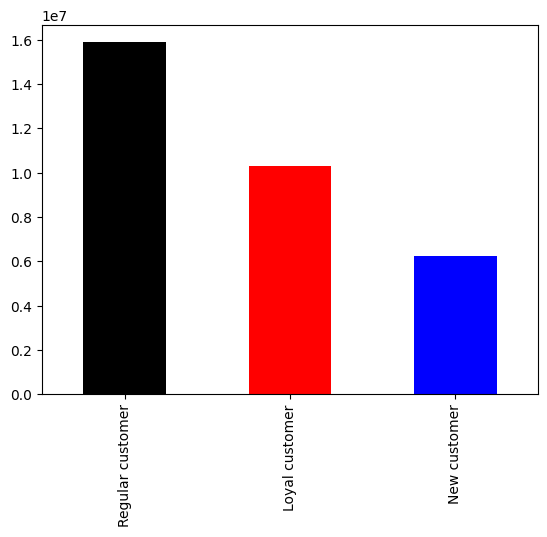

In [26]:
bar_2 = df_cust_ords['loyalty_flag'].value_counts().plot.bar(color = ['black', 'red', 'blue'])

### Creating a line chart depending on the prices and hour of the day

In [27]:
# Using the sample 'small' and making another dataframe with only required columns
df_3 = small[['order_hour_of_day','prices']]

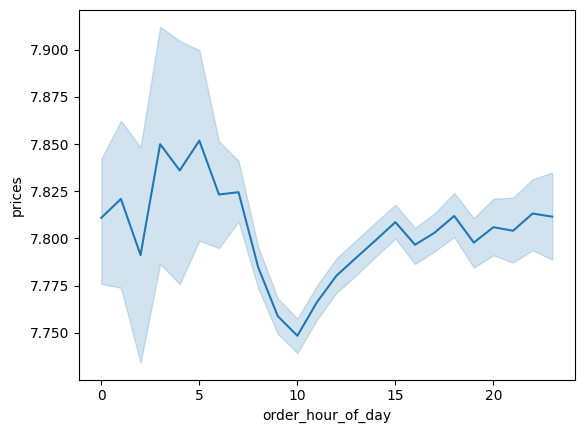

In [44]:
# Creating a line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

The expenditure is lowest around 10 am. 

### Conducting exploratory analysis of customer demographics to inform the targeted marketing campaigns

In [29]:
# Using the sample 'small' and making another dataframe with only required columns
df_4 = small[['age','number_of_dependants']]

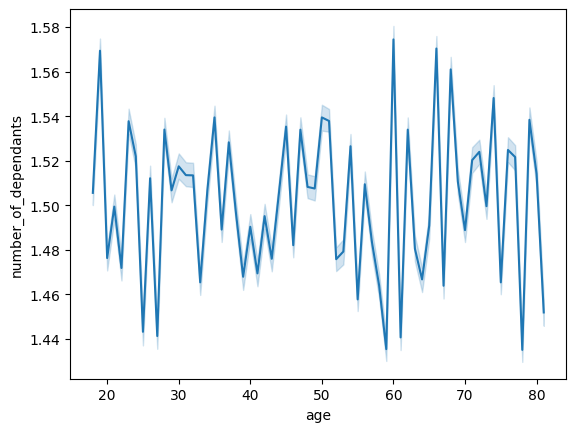

In [45]:
line_3 = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

It is hard to conclude something from the above line chart since it is pretty chaotic. 

### Exploring a connection between age and spending power (income)

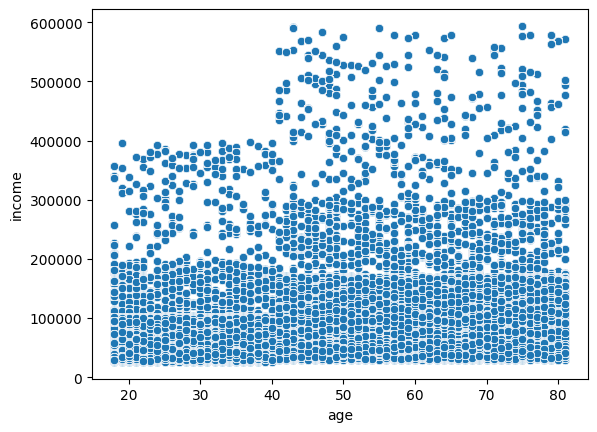

In [46]:
scatter_income = sns.scatterplot(x = 'age', y = 'income',data = df_cust_ords)

From the scattorplot above, we can deduce that many people, regardless of their age, have salaries ranging from 0 to 20000 dollars. However, many people that are older than 40 have income more than 20000 dollars and fewer people below that age earn that much. 

## Saving diagrams in png

In [50]:
bar.figure.savefig('bar_orderday.png')

In [51]:
hist.figure.savefig('hist_prices.png')

In [52]:
hist_2.figure.savefig('hist_orderhour.png')

In [53]:
scatter_prices.figure.savefig('scatterplot_prices.png')

In [54]:
bar_2.figure.savefig('bar_loyalty_flag.png')

In [55]:
line_2.figure.savefig('line_orderhour_prices.png')

In [56]:
line.figure.savefig('line_orderday_prices.png')

In [57]:
line_3.figure.savefig('line_age_dependants.png')

In [58]:
scatter_income.figure.savefig('scatter_age_income.png')